<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Support Vector Machines - Classification</strong></p> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

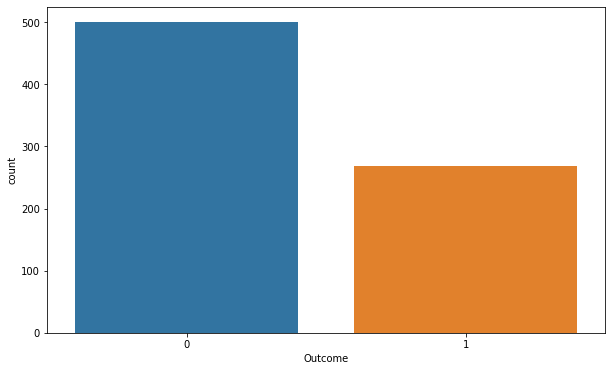

In [8]:
sns.countplot(df.Outcome)

<AxesSubplot:xlabel='Pregnancies'>

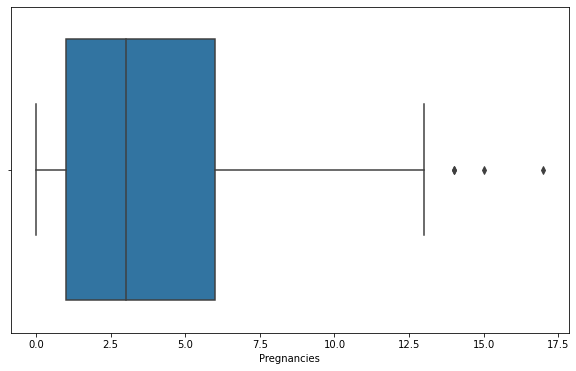

In [9]:
sns.boxplot(df.Pregnancies)

<AxesSubplot:xlabel='SkinThickness'>

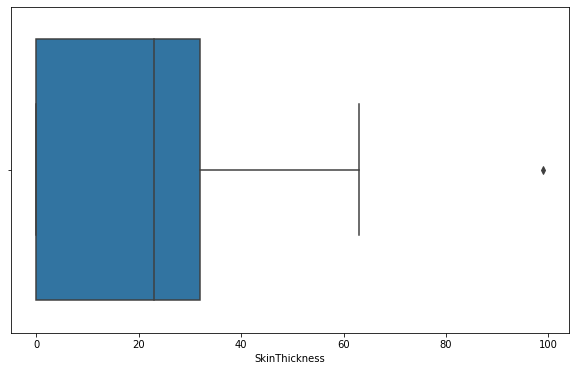

In [10]:
sns.boxplot(df.SkinThickness)

In [11]:
df=df[df.SkinThickness<70]

<AxesSubplot:xlabel='SkinThickness'>

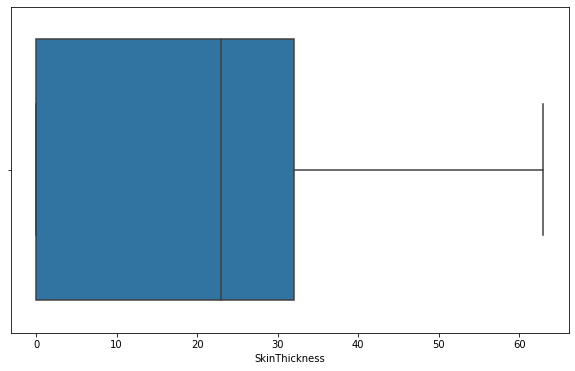

In [12]:
sns.boxplot(df.SkinThickness)

<AxesSubplot:xlabel='Insulin'>

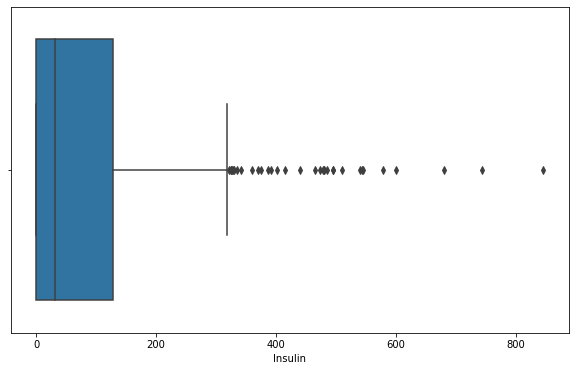

In [13]:
sns.boxplot(df.Insulin)

<AxesSubplot:xlabel='Glucose'>

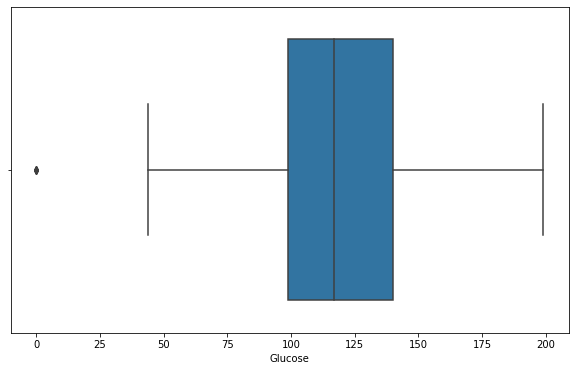

In [14]:
sns.boxplot(df.Glucose)

In [15]:
df=df[df.Glucose>0]

<AxesSubplot:xlabel='Glucose'>

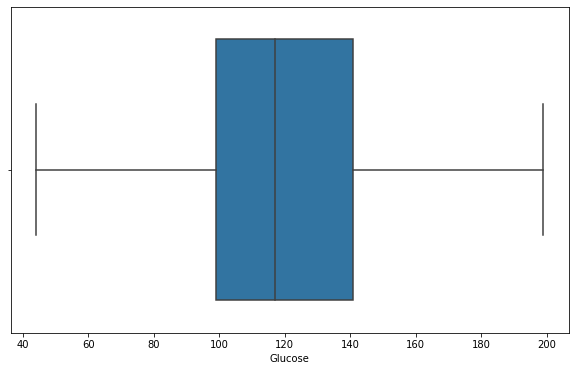

In [16]:
sns.boxplot(df.Glucose)

<AxesSubplot:xlabel='BloodPressure'>

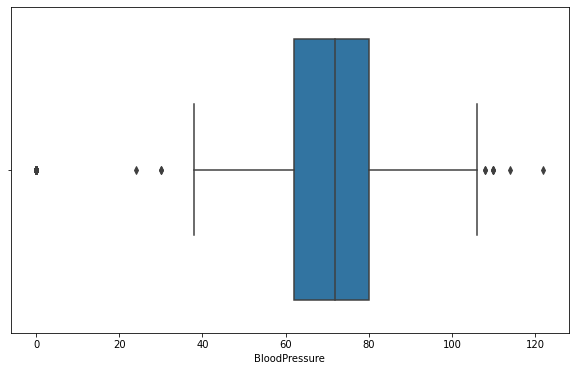

In [17]:
sns.boxplot(df.BloodPressure)

In [18]:
df=df[df.BloodPressure>35]

<AxesSubplot:xlabel='BloodPressure'>

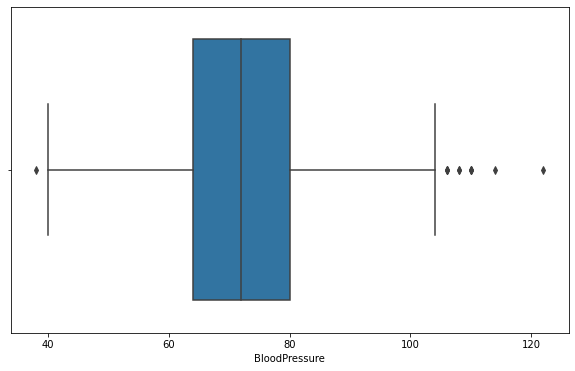

In [19]:
sns.boxplot(df.BloodPressure)

<AxesSubplot:xlabel='BMI'>

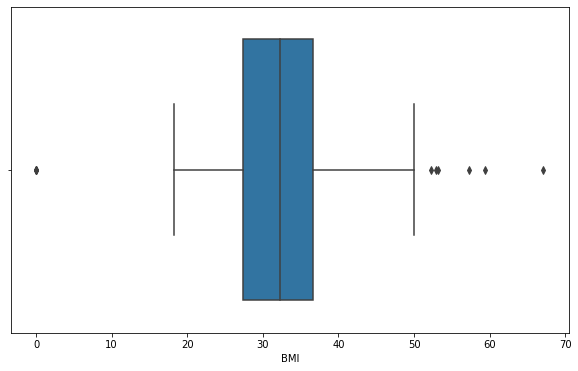

In [20]:
sns.boxplot(df.BMI)

In [21]:
df=df[df.BMI>0]

<AxesSubplot:xlabel='BMI'>

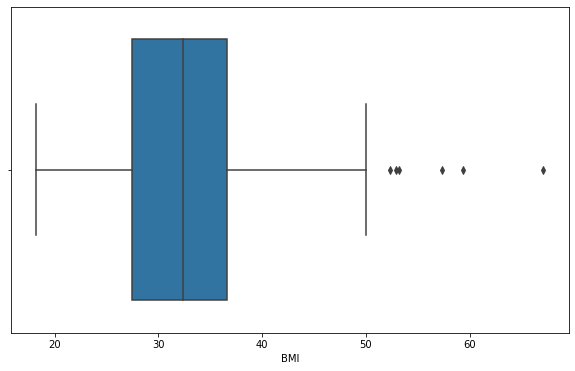

In [22]:
sns.boxplot(df.BMI)

In [23]:
df.shape

(720, 9)

In [24]:
df.Outcome.value_counts()

0    473
1    247
Name: Outcome, dtype: int64

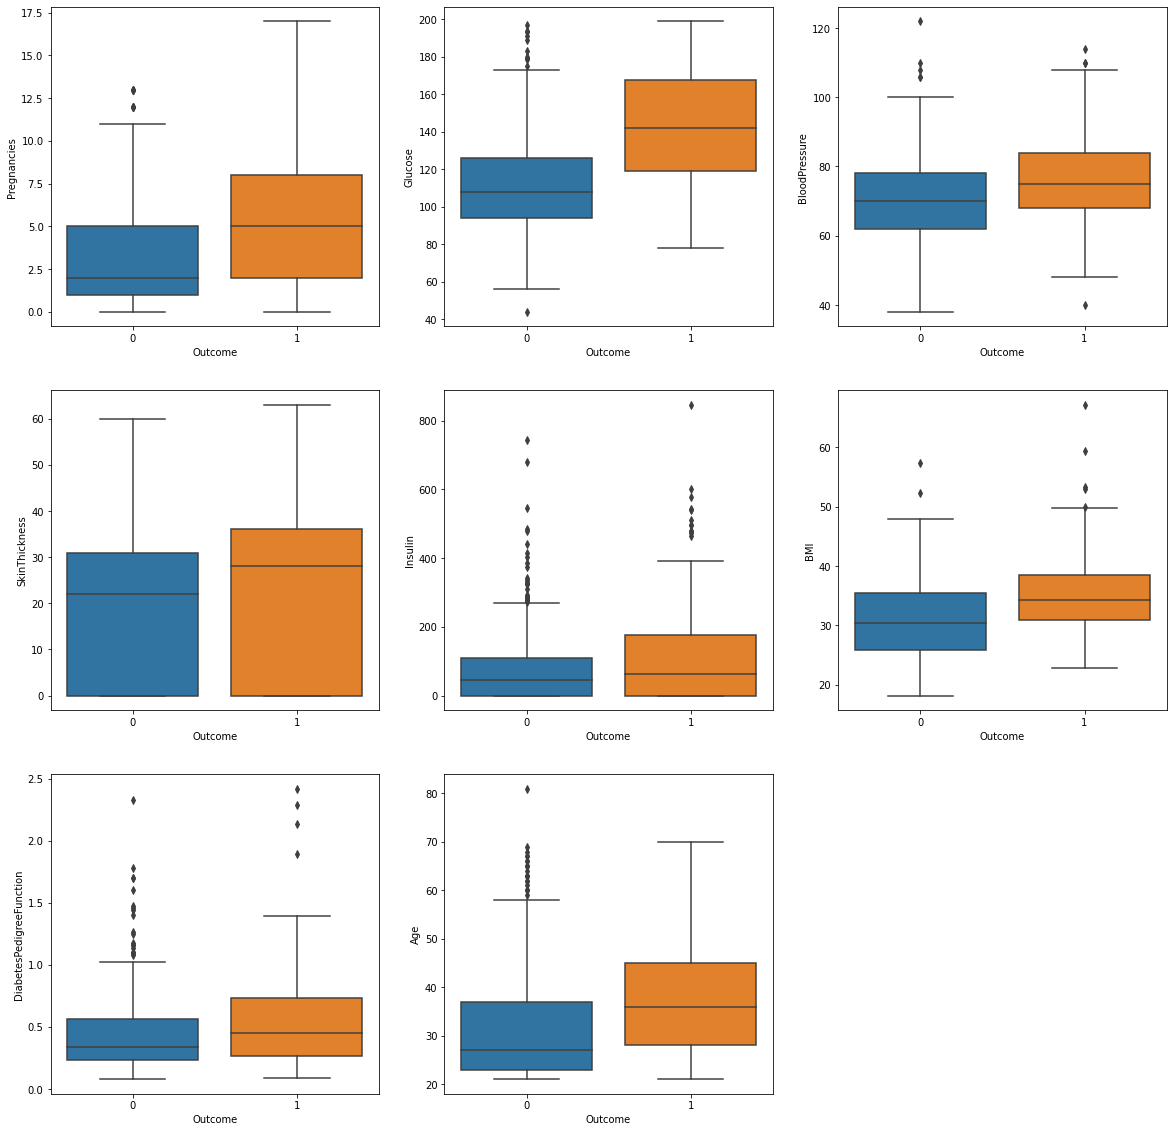

In [25]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

<AxesSubplot:>

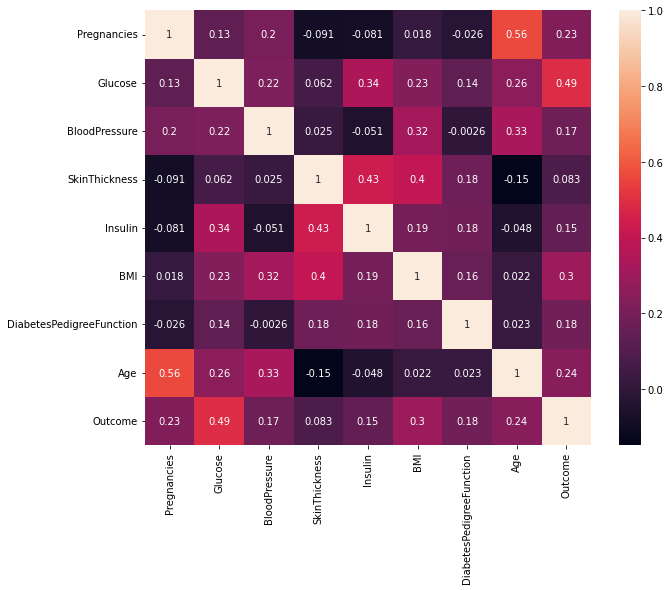

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

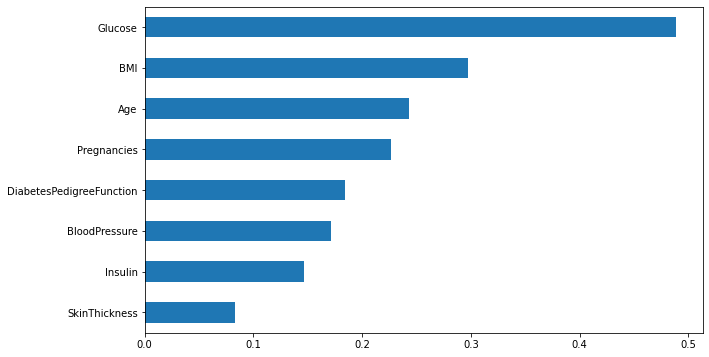

In [27]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

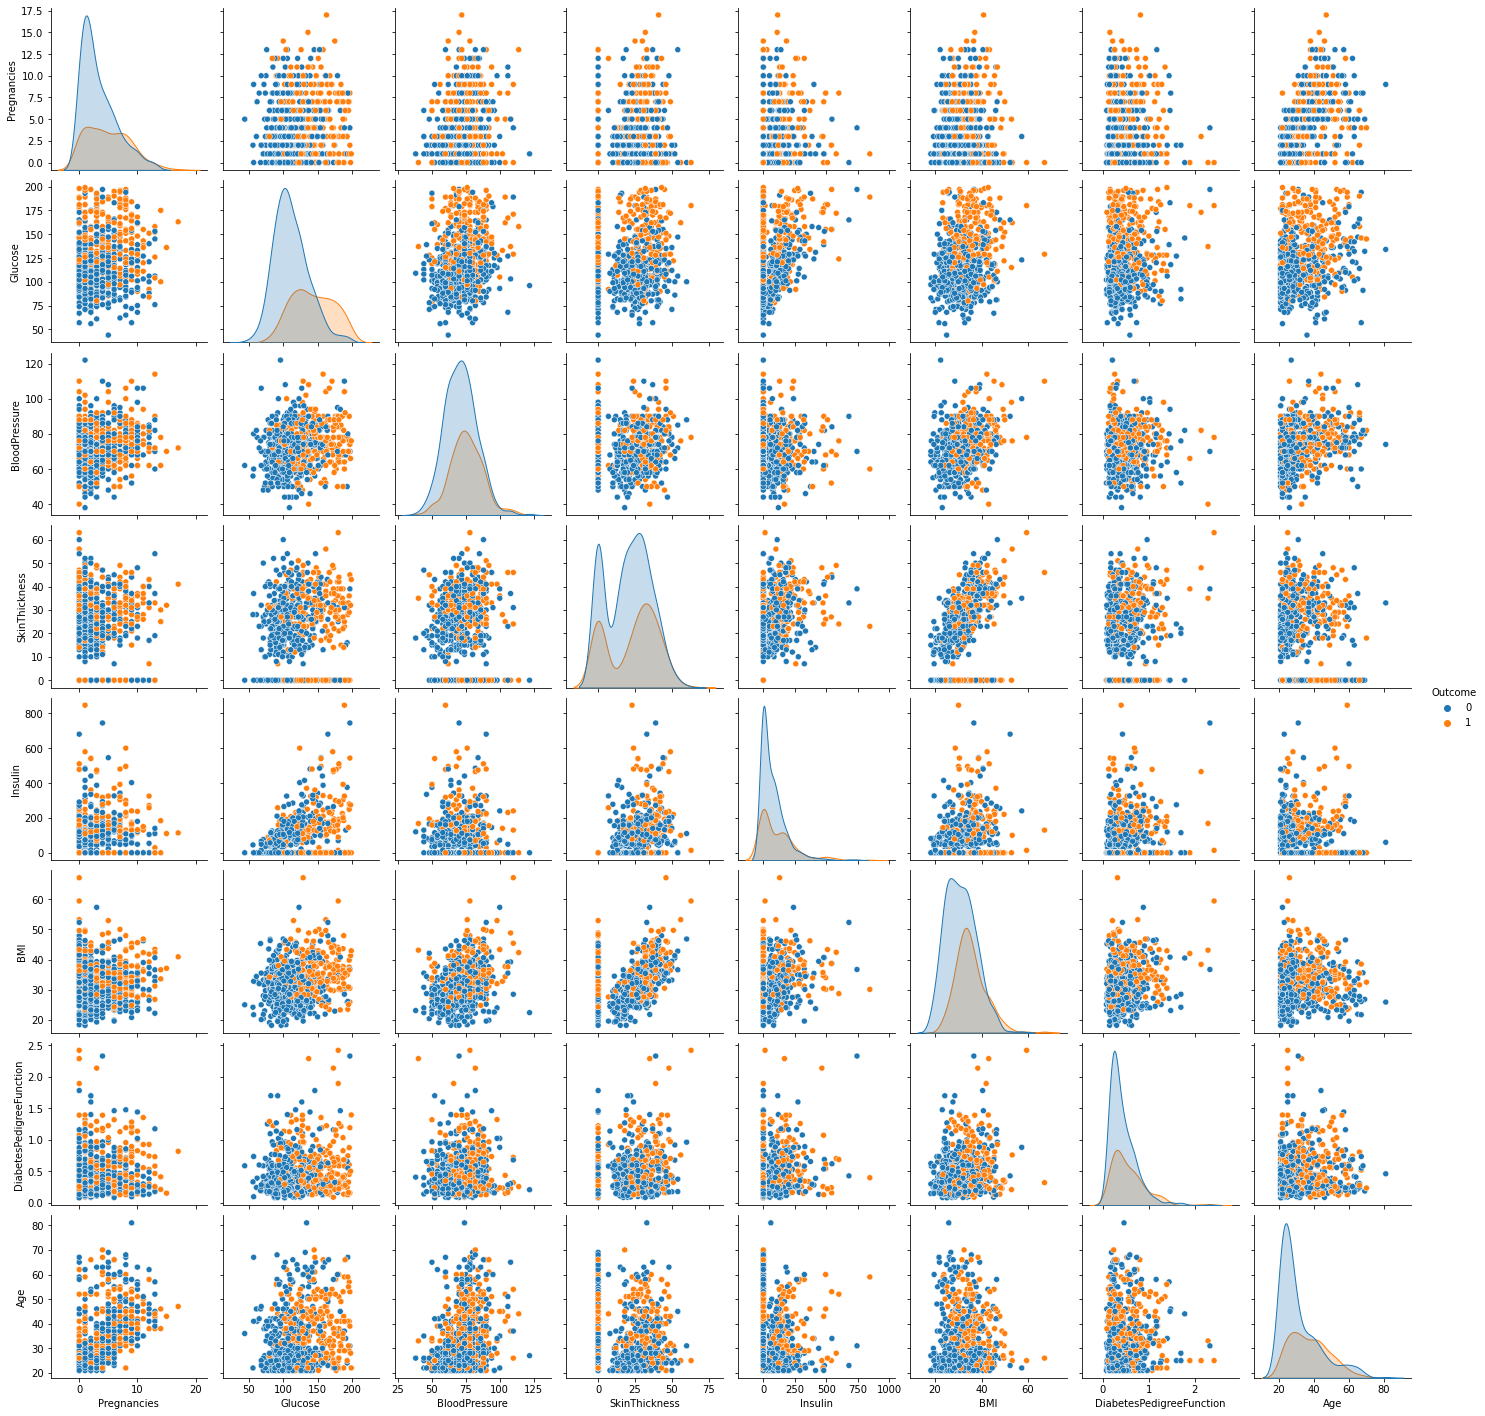

In [28]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
                                                                          ##########

## Modelling and Model Performance

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Without Scalling

In [34]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576



In [35]:
from sklearn.model_selection import cross_validate

model = SVC(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.738
test_precision   0.708
test_recall      0.420
test_f1          0.520
dtype: float64

### With Scalling

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [37]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

In [38]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



In [39]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.752
test_precision   0.673
test_recall      0.536
test_f1          0.594
dtype: float64

### With Best Parameters (GridsearchCV)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

In [42]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state=42))]# probability True to obtain ROC etc.
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="recall", cv=10)

In [43]:
#svm_model_grid.get_params

In [44]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='recall')

In [45]:
svm_model_grid.best_params_

{'SVC__C': 0.05, 'SVC__gamma': 0.3, 'SVC__kernel': 'rbf'}

In [46]:
pd.DataFrame(svm_model_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,param_SVC__gamma,param_SVC__kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101,0.014,0.008,0.002,0.001,scale,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC_...",0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.200,0.400,25
1,0.052,0.001,0.004,0.001,0.001,scale,linear,"{'SVC__C': 0.001, 'SVC__gamma': 'scale', 'SVC_...",0.500,0.550,...,0.750,0.800,0.600,0.632,0.684,0.650,0.550,0.642,0.090,21
2,0.185,0.079,0.017,0.012,0.001,auto,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 'auto', 'SVC__...",0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.200,0.400,25
3,0.077,0.031,0.006,0.003,0.001,auto,linear,"{'SVC__C': 0.001, 'SVC__gamma': 'auto', 'SVC__...",0.500,0.550,...,0.750,0.800,0.600,0.632,0.684,0.650,0.550,0.642,0.090,21
4,0.118,0.023,0.009,0.001,0.001,0.200,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 0.2, 'SVC__ker...",0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.200,0.400,25
5,0.097,0.020,0.012,0.017,0.001,0.200,linear,"{'SVC__C': 0.001, 'SVC__gamma': 0.2, 'SVC__ker...",0.500,0.550,...,0.750,0.800,0.600,0.632,0.684,0.650,0.550,0.642,0.090,21
6,0.106,0.018,0.009,0.001,0.001,0.300,rbf,"{'SVC__C': 0.001, 'SVC__gamma': 0.3, 'SVC__ker...",0.000,0.000,...,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.200,0.400,25
7,0.064,0.007,0.006,0.002,0.001,0.300,linear,"{'SVC__C': 0.001, 'SVC__gamma': 0.3, 'SVC__ker...",0.500,0.550,...,0.750,0.800,0.600,0.632,0.684,0.650,0.550,0.642,0.090,21
8,0.085,0.005,0.007,0.001,0.050,scale,rbf,"{'SVC__C': 0.05, 'SVC__gamma': 'scale', 'SVC__...",0.800,0.750,...,0.900,0.950,0.750,0.895,0.895,0.900,0.750,0.844,0.072,5
9,0.040,0.002,0.004,0.001,0.050,scale,linear,"{'SVC__C': 0.05, 'SVC__gamma': 'scale', 'SVC__...",0.550,0.600,...,0.800,0.750,0.650,0.737,0.789,0.750,0.650,0.703,0.080,9


In [47]:
svm_model_grid.best_index_

14

In [48]:
svm_model_grid.best_score_

0.8942105263157896

In [49]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[45 50]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        95
           1       0.48      0.94      0.63        49

    accuracy                           0.63       144
   macro avg       0.71      0.71      0.63       144
weighted avg       0.78      0.63      0.63       144


Train_Set
[[190 188]
 [ 19 179]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.65       378
           1       0.49      0.90      0.63       198

    accuracy                           0.64       576
   macro avg       0.70      0.70      0.64       576
weighted avg       0.76      0.64      0.64       576



In [63]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 0.05, gamma= 0.3, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced", random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.616
test_precision   0.475
test_recall      0.894
test_f1          0.618
dtype: float64

In [64]:
#Looking up parameters that can be passed to the pipeline
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'SVC', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'SVC__C', 'SVC__break_ties', 'SVC__cache_size', 'SVC__class_weight', 'SVC__coef0', 'SVC__decision_function_shape', 'SVC__degree', 'SVC__gamma', 'SVC__kernel', 'SVC__max_iter', 'SVC__probability', 'SVC__random_state', 'SVC__shrinking', 'SVC__tol', 'SVC__verbose'])

In [51]:
svm_model_grid.predict(X_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0])

## Overall performance of the model

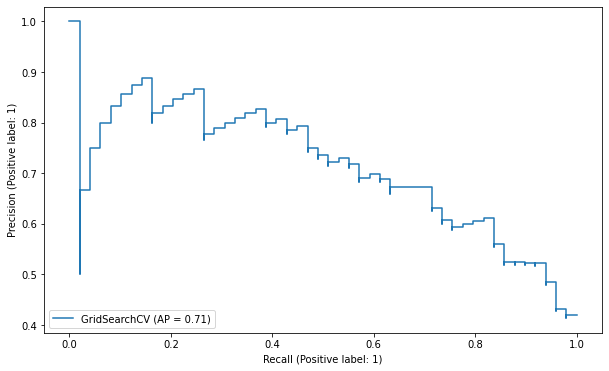

In [52]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
plot_precision_recall_curve(svm_model_grid, X_test, y_test);

## Finding Best Threshold for max f1 score

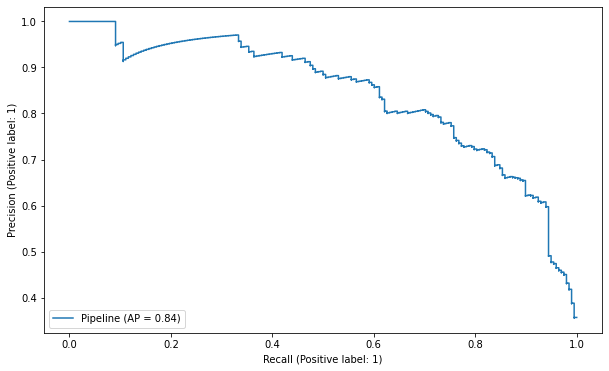

In [53]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))]
svc_basic_model = Pipeline(steps=operations)

svc_basic_model.fit(X_train, y_train)
plot_precision_recall_curve(svc_basic_model, X_train, y_train);

In [54]:
y_pred_proba = svc_basic_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.8415032373442909

In [55]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [56]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3069561306924304

In [57]:
y_pred2 = pd.Series(svm_model_grid.predict_proba(X_test)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [58]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[59 36]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        95
           1       0.54      0.86      0.66        49

    accuracy                           0.70       144
   macro avg       0.72      0.74      0.70       144
weighted avg       0.77      0.70      0.71       144



In [59]:
y_train_pred2 = pd.Series(svm_model_grid.predict_proba(X_train)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[229 149]
 [ 29 169]]
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       378
           1       0.53      0.85      0.66       198

    accuracy                           0.69       576
   macro avg       0.71      0.73      0.69       576
weighted avg       0.77      0.69      0.70       576

